# pre-processing

In [1]:
#enable autocomplete
%config IPCompleter.greedy=True 

#load packages
import sys #access to system parameters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#load data
file_path = r"titanic_train.csv"
data = pd.read_csv(file_path)
#complete missing age with median
data['Age'].fillna(data['Age'].median(), inplace = True)

#complete missing fare with median
data['Fare'].fillna(data['Fare'].median(), inplace = True)

#complete embarked with mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

#complete Cabin with mode
data['Cabin'].fillna(data['Cabin'].mode()[0], inplace = True)

data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

data['IsAlone'] = 1 #initialize to yes/1 is alone
data['IsAlone'].loc[data['FamilySize'] > 1] = 0

def my_regex(x):
    try:
        num = re.search(r'[0-9]+',x)
        return num.group(0)
    except:
        return 0
    return 

data['Cabin Num'] = data.Cabin.apply(lambda x : my_regex(x))    
#data.head()  

x = data[['Cabin Num','IsAlone','FamilySize','Parch','SibSp','Age']]

y = data.Survived

C:\Users\zigi\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


# Split Training and Testing Data

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Ovefit & Bias

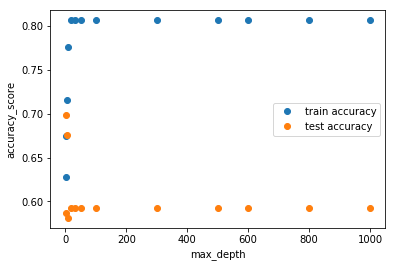

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#max_depth
max_depth = [1,2,5,10,20,30,50,100,300,500,600,800,1000,None]
accuracy_score_train_list = list()
accuracy_score_test_list = list()
for i in max_depth:

    decision_tree = DecisionTreeClassifier(max_depth = i)
    decision_tree = decision_tree.fit(x_train, y_train)

    y_pred_train = decision_tree.predict(x_train)
    y_pred_test = decision_tree.predict(x_test)

    accuracy_score_train_list.append(accuracy_score(y_train, y_pred_train))
    accuracy_score_test_list.append(accuracy_score(y_test, y_pred_test))
    
plt.plot(max_depth,accuracy_score_train_list,'o')
plt.plot(max_depth,accuracy_score_test_list,'o')
plt.xlabel("max_depth")
plt.ylabel("accuracy_score")
plt.legend(['train accuracy','test accuracy'])
plt.show()